# imort libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sn

# load data and look asimple of data

In [2]:
df = pd.read_excel('/kaggle/input/customer-churn/credit-card_customers.xlsx')
df.head().T

,0,1,2,3,4
Customer_Number,3708092208,3708093408,3708094683,3708095583,3708097083
Attrition_Flag,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Existing Customer
Age,45,58,46,34,49
Date_of_birth,1979-06-09 00:00:00,1966-05-28 00:00:00,1978-06-29 00:00:00,1990-06-23 00:00:00,1975-03-12 00:00:00
Gender,F,M,M,F,F
Dependent_count,3,0,3,2,2
Education_Level,High School,Unknown,Doctorate,Uneducated,Uneducated
Marital_Status,Married,Single,Divorced,Single,Married
Income_Category,Less than $40K,$40K - $60K,$80K - $120K,Less than $40K,Unknown
Card_Category,Blue,Blue,Blue,Blue,Blue


In [3]:
df.shape

(12126, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12126 entries, 0 to 12125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Number           12126 non-null  int64         
 1   Attrition_Flag            12026 non-null  object        
 2   Age                       12126 non-null  int64         
 3   Date_of_birth             12126 non-null  datetime64[ns]
 4   Gender                    11926 non-null  object        
 5   Dependent_count           12126 non-null  int64         
 6   Education_Level           11926 non-null  object        
 7   Marital_Status            12126 non-null  object        
 8   Income_Category           12126 non-null  object        
 9   Card_Category             11924 non-null  object        
 10  Months_on_book            12126 non-null  int64         
 11  Total_Relationship_Count  12126 non-null  int64         
 12  Months_Inactive_12

# clean data

## cleening duplicated row data

In [5]:
du = df.duplicated() == True
du.value_counts()

False    11725
True       401
Name: count, dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
du = df.duplicated() == True
du.value_counts()

False    11725
Name: count, dtype: int64

## handle unknown value

In [7]:
(df == 'Unknown').sum().sum()

3962

In [8]:
df.replace('Unknown', np.nan, inplace=True)
(df == 'Unknown').sum().sum()

0

## handle missing value

In [9]:
df.isna().sum()

Customer_Number                0
Attrition_Flag               200
Age                            0
Date_of_birth                  0
Gender                       200
Dependent_count                0
Education_Level             1891
Marital_Status               867
Income_Category             1304
Card_Category                202
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [10]:
df = df.dropna(axis=0)
df.isna().sum()

Customer_Number             0
Attrition_Flag              0
Age                         0
Date_of_birth               0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df.shape

(7673, 22)

## handiling outliers

In [12]:
df.Age.describe()

count    7673.000000
mean       46.766063
std        12.784464
min         5.000000
25%        40.000000
50%        46.000000
75%        52.000000
max       120.000000
Name: Age, dtype: float64

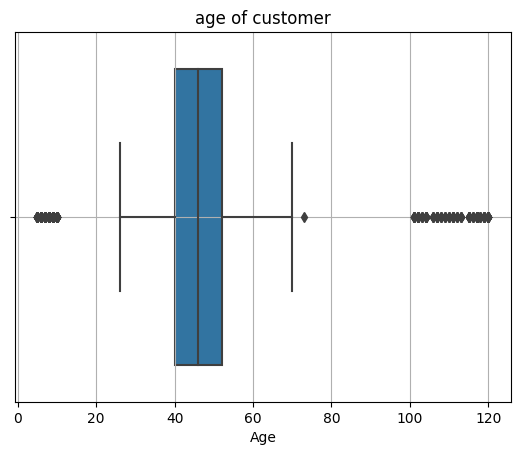

In [13]:
sns.boxplot(x= df['Age'])
plt.title("age of customer")
plt.grid(True)
plt.show()

### IQR for cleen outliers

In [14]:
age_25th_percentile = df['Age'].quantile(0.25)
age_50th_percentile = df['Age'].quantile(0.5)
age_75th_percentile = df['Age'].quantile(0.75)
print(age_25th_percentile, age_50th_percentile, age_75th_percentile)

40.0 46.0 52.0


In [15]:
age_IQR = age_75th_percentile - age_25th_percentile
print(age_IQR)

12.0


In [16]:
age_upper_limit = age_75th_percentile + (1.5 * age_IQR)
age_lower_limit = age_25th_percentile - (1.5 * age_IQR)
print(age_upper_limit, age_lower_limit)

70.0 22.0


In [17]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]
# We take the lower limit = 21 because according to our search we found that the minimum age for making bank account in CIB bank = 21

In [18]:
print(f"Original Data Shape: {df.shape}")
print(f"min = {df['Age'].min()},max = {df['Age'].max()}")

Original Data Shape: (7399, 22)
min = 26,max = 73


In [19]:
len(df)

7399

# Analysis Data
# Churn Rate Analysis

In [20]:
churn_rate = df['Attrition_Flag'].value_counts(normalize=True) * 100
print("Churn Rate: \n", churn_rate)

Churn Rate: 
 Attrition_Flag
Existing Customer    84.227598
Attrited Customer    15.772402
Name: proportion, dtype: float64


In [21]:
df['Attrition_Flag'].values

array(['Existing Customer', 'Attrited Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Existing Customer'],
      dtype=object)

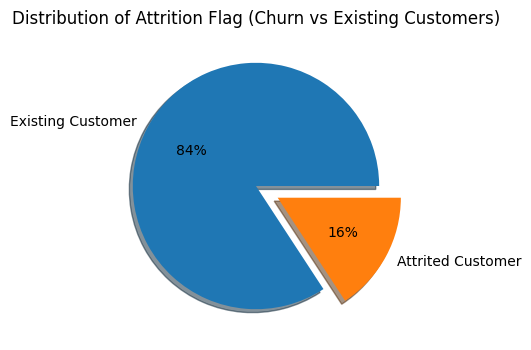

In [22]:
ex_labels = ['Existing Customer', 'Attrited Customer']
plt.figure(figsize=(6, 4))
plt.axis("equal")
plt.pie(x=churn_rate, labels=ex_labels, autopct='%0.0f%%',explode=[0,0.2],shadow=True )
plt.title('Distribution of Attrition Flag (Churn vs Existing Customers)')
plt.show()

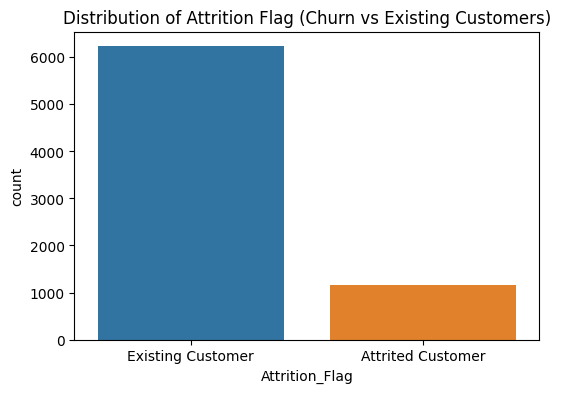

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Attrition_Flag'], data=df)
plt.title('Distribution of Attrition Flag (Churn vs Existing Customers)')
plt.show()

# Demographics Analysis

In [24]:
comparison = df.groupby('Attrition_Flag').agg({
    'Age': ['mean', 'std'],
    'Credit_Limit': ['mean', 'std'],
    'Total_Trans_Amt': ['mean', 'std'],
    'Total_Trans_Ct': ['mean', 'std'],
    'Avg_Utilization_Ratio': ['mean', 'std'],
    'Months_Inactive_12_mon': ['mean', 'std'],
    'Contacts_Count_12_mon': ['mean', 'std'],
})
df_comparison = pd.DataFrame(comparison)
df_comparison

Age           Credit_Limit               \
                        mean       std         mean          std   
Attrition_Flag                                                     
Attrited Customer  46.478149  7.811852  7824.188089  9094.722762   
Existing Customer  46.344352  8.144646  8383.280873  9095.906103   

                  Total_Trans_Amt              Total_Trans_Ct             \
                             mean          std           mean        std   
Attrition_Flag                                                             
Attrited Customer     3093.748072  2381.814447      44.658955  15.262996   
Existing Customer     4622.313383  3573.653096      68.150995  23.283688   

                  Avg_Utilization_Ratio           Months_Inactive_12_mon  \
                                   mean       std                   mean   
Attrition_Flag                                                             
Attrited Customer              0.159925  0.266591               2.693231   
Existing Customer              0.303248  0.274994               2.277439   

                            Contacts_Count_12_mon            
                        std                  mean       std  
Attrition_Flag                                               
Attrited Customer  0.888354              2.951157  1.100528  
Existing Customer  1.002429              2.370668  1.087103

## Age Distribution by customers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

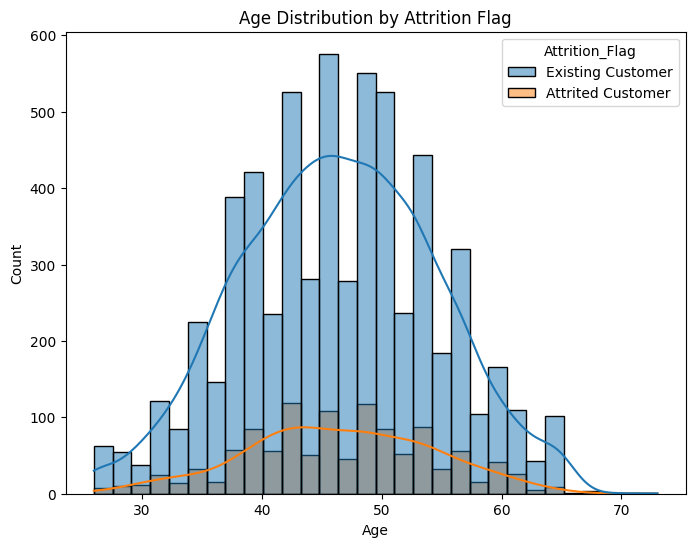

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Attrition_Flag', kde=True, bins=30)
plt.title('Age Distribution by Attrition Flag')
plt.show()

# Income and education level analysis

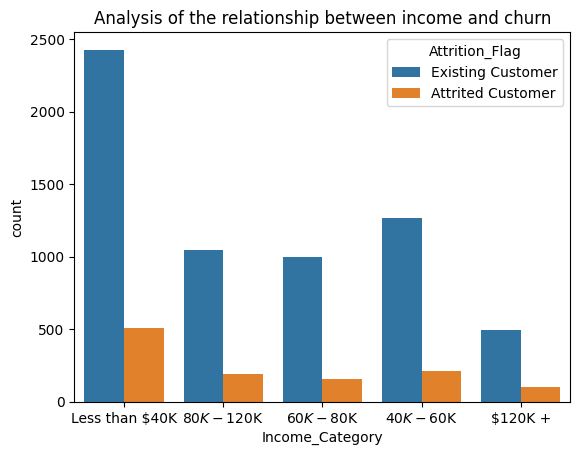

In [26]:
#Analysis of the relationship between income and churn
sns.countplot(x='Income_Category',hue='Attrition_Flag',data=df)
plt.title('Analysis of the relationship between income and churn')
plt.show()

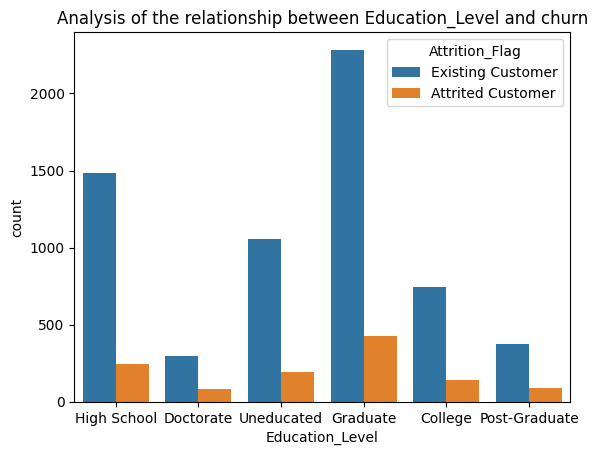

In [27]:
#Analysis of the relationship between Education_Level and churn
sns.countplot(x='Education_Level',hue='Attrition_Flag',data=df)
plt.title('Analysis of the relationship between Education_Level and churn')
plt.show()

# Transaction behavior analysis

<Axes: xlabel='Months_on_book'>

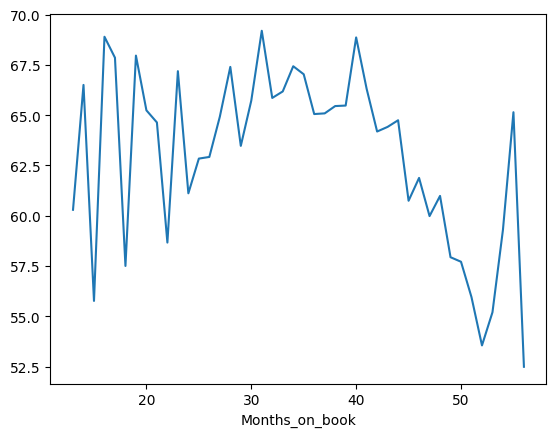

In [28]:
# chang of trancaction for time ago analysis
df.groupby('Months_on_book')['Total_Trans_Ct'].mean().plot()

# customer service cantact analysis 

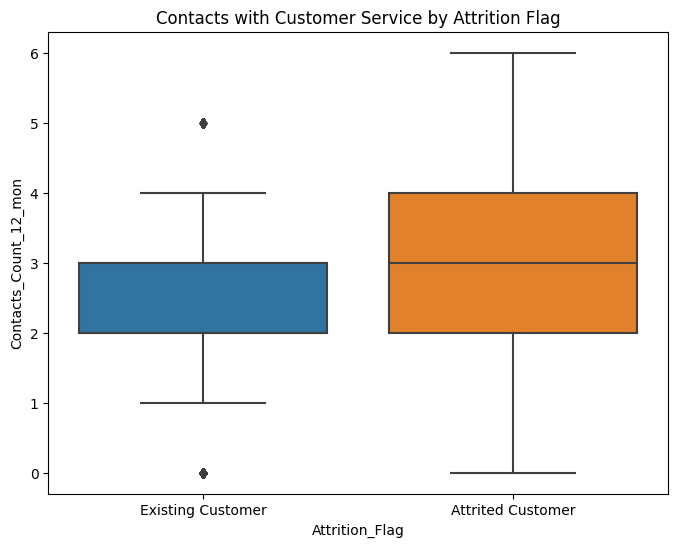

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df)
plt.title('Contacts with Customer Service by Attrition Flag')
plt.show()

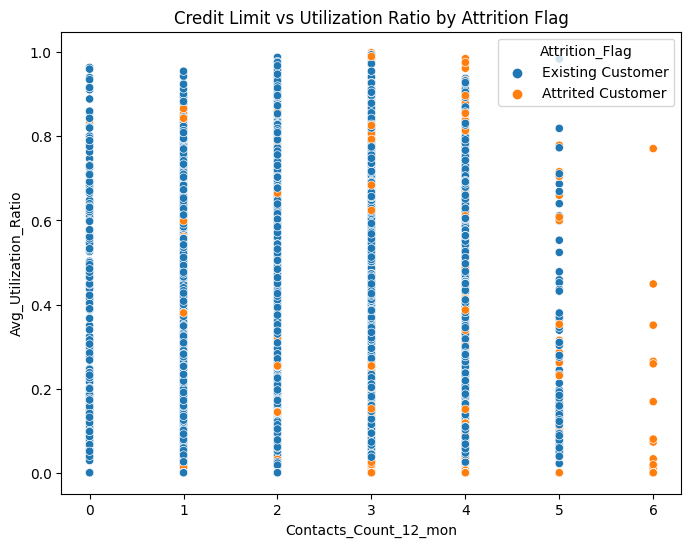

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Contacts_Count_12_mon', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.title('Credit Limit vs Utilization Ratio by Attrition Flag')
plt.show()

# product analysis

Text(0.5, 1.0, 'product analysis by churn')

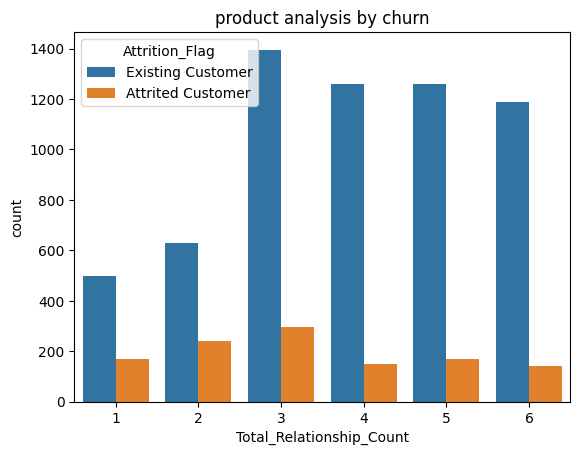

In [31]:
# Analysis of the relationship between Total_Relationship_Count and Attrition_Flag
sns.countplot(x='Total_Relationship_Count',hue='Attrition_Flag',data=df)
plt.title("product analysis by churn")

# cardit limit analysis 

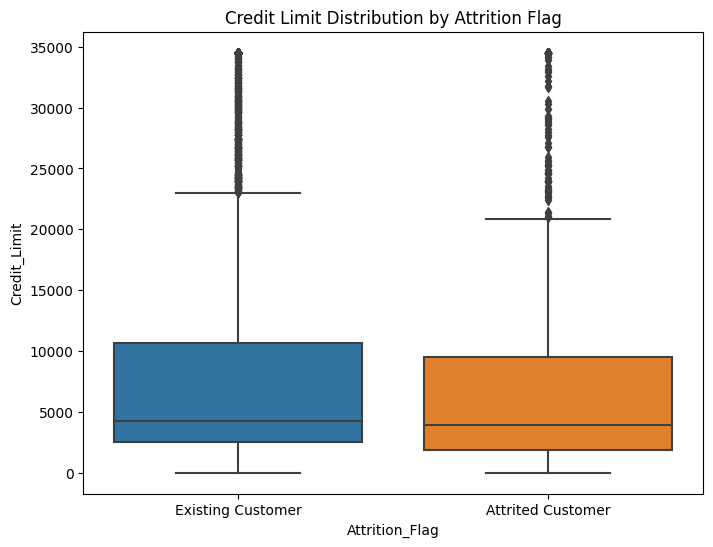

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Credit Limit Distribution by Attrition Flag')
plt.show()

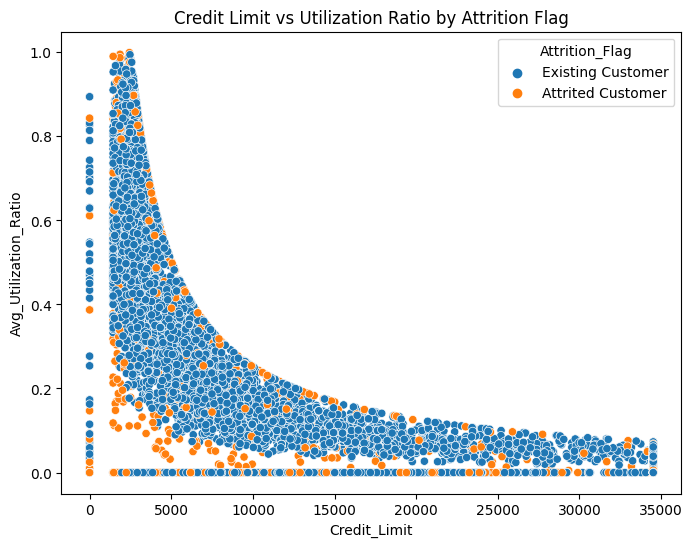

In [33]:
## Analysis of the relationship between credit limit and utilization ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.title('Credit Limit vs Utilization Ratio by Attrition Flag')
plt.show()

# preprocessing

## drop features not needed

In [34]:
df.drop(['Customer_Number'],axis=1,inplace=True)
df.head().T

,0,2,3,6,7
Attrition_Flag,Existing Customer,Attrited Customer,Existing Customer,Existing Customer,Existing Customer
Age,45,46,34,32,37
Date_of_birth,1979-06-09 00:00:00,1978-06-29 00:00:00,1990-06-23 00:00:00,1992-08-06 00:00:00,1987-07-04 00:00:00
Gender,F,M,F,F,F
Dependent_count,3,3,2,0,2
Education_Level,High School,Doctorate,Uneducated,Graduate,High School
Marital_Status,Married,Divorced,Single,Married,Single
Income_Category,Less than $40K,$80K - $120K,Less than $40K,Less than $40K,Less than $40K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,36,38,24,19,36


## encoding data

In [35]:
#replace churn 0   non churn 0  Attrited Customer 0 , 'Existing Customer 1
df = df.apply(LabelEncoder().fit_transform)
df.head().T

,0,2,3,6,7
Attrition_Flag,1,0,1,1,1
Age,19,20,8,6,11
Date_of_birth,2576,2401,4190,4363,3877
Gender,0,1,0,0,0
Dependent_count,3,3,2,0,2
Education_Level,3,1,5,2,3
Marital_Status,1,0,2,1,2
Income_Category,4,3,4,4,4
Card_Category,0,0,0,0,0
Months_on_book,23,25,11,6,23


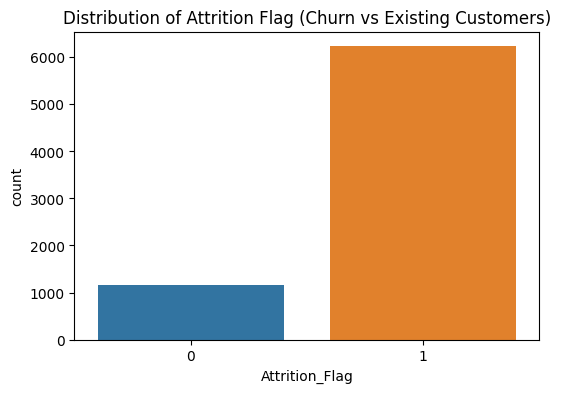

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Attrition_Flag'], data=df)
plt.title('Distribution of Attrition Flag (Churn vs Existing Customers)')
plt.show()

## split data for input and target (x,y)


In [37]:
x = df.drop(columns=['Attrition_Flag'],axis=1)
y = df.Attrition_Flag
x

,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,19,2576,0,3,3,1,4,0,23,3,3,3,1475,1116,1399,526,4026,101,388,460
2,20,2401,1,3,1,0,3,0,25,5,3,3,2902,1223,2984,0,421,13,0,207
3,8,4190,0,2,5,2,4,0,11,5,2,2,1,0,1099,522,2122,72,565,0
6,6,4363,0,0,2,1,4,0,6,5,1,0,1015,881,1086,973,550,29,421,491
7,11,3877,0,2,3,2,4,0,23,3,2,2,2306,1318,2266,546,1432,53,488,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,15,3253,0,3,0,1,4,0,24,2,1,2,1,264,463,339,2211,56,351,523
12121,24,1595,1,0,5,1,2,0,33,3,1,3,1523,174,1914,633,1989,60,478,174
12122,12,3705,1,3,0,2,2,0,21,5,3,4,3505,1272,3638,325,1174,30,179,144
12123,23,1747,0,3,3,1,4,0,32,2,2,3,1096,1769,296,460,1286,26,243,816


In [38]:
y

0        1
2        0
3        1
6        1
7        1
        ..
12120    1
12121    1
12122    0
12123    0
12124    1
Name: Attrition_Flag, Length: 7399, dtype: int64

## scaling data

In [39]:
StandardScalerModel = StandardScaler()
x = StandardScalerModel.fit_transform(x)
x

array([[-0.16870572,  0.1974521 , -1.04549955, ...,  1.9558632 ,
         0.19293996,  0.67422392],
       [-0.04510402,  0.05848549,  0.95648057, ..., -1.74123019,
        -2.34486805, -0.24472726],
       [-1.52832449,  1.47912137, -1.04549955, ...,  0.73750288,
         1.35065135, -0.99659641],
       ...,
       [-1.03391767,  1.09398532,  0.95648057, ..., -1.02701897,
        -1.17407518, -0.473557  ],
       [ 0.3257011 , -0.46085262, -1.04549955, ..., -1.19506867,
        -0.75546767,  1.96729356],
       [ 0.94370964, -1.11836325,  0.95648057, ..., -0.73293199,
         0.23872516,  1.54595626]])

## Split data into train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [41]:
print(X_train.shape)
print(X_test.shape)

(5179, 20)
(2220, 20)


# create model

In [42]:
# create model ( RandomForestClassifier) and train model
model = RandomForestClassifier(n_estimators=3) # the number of decision trees 
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

# Evulate model

In [43]:
model.score(X_train, y_train)

0.9862907897277466

In [44]:
model.score(X_test, y_test)

0.9333333333333333

In [45]:
#y_pred = predict x_test
y_pred = model.predict(X_test)

In [46]:
# print mean_squared_error from model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.06666666666666667


# confusion_matrix

In [47]:
#confusion_matrix to know Accuracy of model
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 270,  101],
       [  47, 1802]])

Text(95.72222222222221, 0.5, 'Truth')

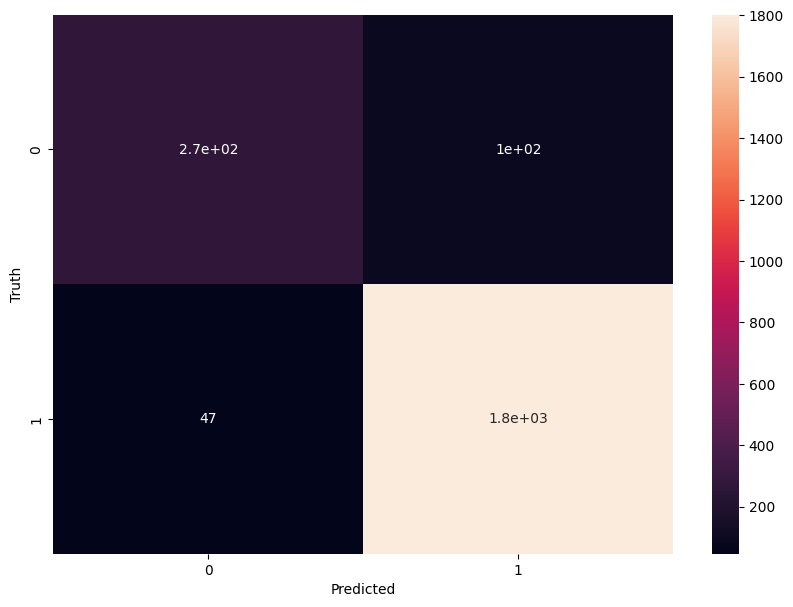

In [48]:
# visualizations confusion_matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')